In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
rent_data = pd.read_csv('House_Rent_Dataset.csv')
rent_data.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
10,2022-05-23,3,25000,1200,1 out of 4,Carpet Area,"Action Area 1, Rajarhat Newtown",Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Agent
2124,2022-04-30,1,8500,500,1 out of 2,Super Area,"Rmv Extension, Armane Nagar",Bangalore,Semi-Furnished,Bachelors,1,Contact Owner
3968,2022-07-10,3,40000,1900,4 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
539,2022-05-13,2,33500,700,4 out of 7,Carpet Area,"Yogi Hills, Mulund West",Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Agent
419,2022-05-31,2,4500,475,Ground out of 2,Super Area,Birati,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner


### *About the dataset (12columns)*

- BHK: Number of Bedrooms, Hall, Kitchen.
침실, 홀, 주방 개수

- Rent: Rent of the Houses/Apartments/Flats.
주택/아파트 임대료

- Size: Size of the Houses/Apartments/Flats in Square Feet.
제곱 피트 단위의 주택/아파트 크기

- Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
주택 건물의 총 층수와 주택이 위치한 층수 정보 (예: 5층 중 3층) 
first floor, ground floor 의 차이 있음 

- Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
    - Carpet Area : 해당 주택의 순 사용 가능 공간, 모든 구역으로 외부 공간(발코니, 엘리베이터, 로비 등 기타 공간) 포함 안됨
    - Build Area: 카펫 공간과 벽, 창문, 계단 으로 둘러싸인 면적을 더한 것, 발코니, 테라스, 메자닌 바닥, 기타 분리가능한 거주 공간이 건축 면적에 포함됨
    - Super Area: 출입구 로비, 복도, 계단, 엘리베이터, 발전기실, 보안실 및 기타 단지 내 공용 공간의 부분이 포함. 

- Area Locality: Locality of the Houses/Apartments/Flats.
주택/아파트 지역성

- City: City where the Houses/Apartments/Flats are Located.
주택/아파트 위치한 도시

- Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
가구 상태(가구가 있거나, 반가구 거나, 가구가 없는 경우)

- Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
어떤 임차인에게 선호되는지

- Bathroom: Number of Bathrooms.
욕실의 수

- Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.
컨택 포인트

In [52]:
print(f'Number of rows: {rent_data.shape[0]}')
print(f'Number of columns: {rent_data.shape[1]}')

Number of rows: 4746
Number of columns: 12


In [53]:
#전부 4726개의 데이터; 결측값 없음
#string 타입이 많음 
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [54]:
#중복값 데이터 확인
rent_data.duplicated().sum()

0

In [55]:
#삭제후보 확인
rent_data['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: count, dtype: int64

In [56]:
#에이전트와 오너의 평균 임대가격차이가 4배이상 보임,가격에 영향을 주는 변수인가? > 일단 남겨두기
rent_data_owner = \
rent_data.groupby(['Point of Contact'], as_index=False) \
    .mean(['Rent', 'Size'])[['Point of Contact', 'Rent', 'Size']]
rent_data_owner

,Point of Contact,Rent,Size
0,Contact Agent,73481.158927,1164.812296
1,Contact Builder,5500.000000,400.000000
2,Contact Owner,16704.206468,873.853545


In [57]:
rent_data.loc[rent_data['Point of Contact'] == 'Contact Builder', 'Point of Contact'] = 'Contact Agent'

In [58]:
rent_data['Point of Contact'].value_counts()

Point of Contact
Contact Owner    3216
Contact Agent    1530
Name: count, dtype: int64

In [59]:
#층정보 문자열 데이터 숫자 분리하기
rent_data['Floor']

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object

In [60]:
rent_data['TotalFloor']=rent_data['Floor'].str.split().str[-1]
rent_data['TotalFloor'].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34',
       'Ground'], dtype=object)

In [61]:
rent_data['TotalFloor'].replace({'Ground' : 0 }, inplace = True)
rent_data['TotalFloor'] = rent_data['TotalFloor'].astype(np.int8)

In [62]:
rent_data['RentFloor']=rent_data['Floor'].str.split().str[0]
rent_data['RentFloor'].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper', '11',
       'Lower', '6', '14', '43', '13', '18', '17', '9', '19', '60', '34',
       '12', '26', '25', '53', '16', '10', '39', '32', '47', '28', '20',
       '15', '65', '40', '37', '22', '21', '30', '35', '33', '44', '41',
       '46', '27', '45', '48', '50', '24', '23', '29', '49', '36', '76'],
      dtype=object)

In [63]:
# 'Ground' to 0, 'Upper' to 0.5, 'Lower' to -1 로 대체하기
#  데이터 타입 int8로 변경

rent_data['RentFloor'].replace({'Ground' : 0 , 'Upper' : 0.5, 'Lower' : -1}, inplace = True)
rent_data['RentFloor'] = rent_data['RentFloor'].astype(np.int8)
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
 12  TotalFloor         4746 non-null   int8  
 13  RentFloor          4746 non-null   int8  
dtypes: int64(4), int8(2), object(8)
memory usage: 454.3+ KB


In [64]:
rent_data['RentFloor'].max()

76

In [65]:
rent_data['TotalFloor'].max()

89

In [66]:
rent_data.drop('Floor', axis=1,inplace=True)

In [67]:
#문자열 날짜 데이터 > 데이트 타입으로 변경
rent_data['Posted On'] = pd.to_datetime(rent_data['Posted On'])

In [68]:
rent_data['Month'] = rent_data['Posted On'].dt.month
rent_data['Month'].value_counts().sort_index()

Month
4     228
5    1681
6    1859
7     978
Name: count, dtype: int64

In [69]:
rent_data.drop('Month', axis=1,inplace=True)

In [70]:
rent_data.drop('Posted On', axis=1,inplace=True)


In [71]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   Area Locality      4746 non-null   object
 5   City               4746 non-null   object
 6   Furnishing Status  4746 non-null   object
 7   Tenant Preferred   4746 non-null   object
 8   Bathroom           4746 non-null   int64 
 9   Point of Contact   4746 non-null   object
 10  TotalFloor         4746 non-null   int8  
 11  RentFloor          4746 non-null   int8  
dtypes: int64(4), int8(2), object(6)
memory usage: 380.2+ KB


In [72]:
# Rent의 평균이 중간값과 2배 이상의 차이가 보여짐 > 이상치 예상됨
rent_data.describe()

,BHK,Rent,Size,Bathroom,TotalFloor,RentFloor
count,4746.000000,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866,6.968605,3.443321
std,0.832256,7.810641e+04,634.202328,0.884532,9.467245,5.768657
min,1.000000,1.200000e+03,10.000000,1.000000,0.000000,-1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000,2.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000,4.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000,6.000000,3.000000
max,6.000000,3.500000e+06,8000.000000,10.000000,89.000000,76.000000


In [82]:
rent_data["Rent"].mean()

34993.45132743363

In [83]:
rent_data["Rent"].quantile(0.5)

16000.0

In [84]:
#이상치 값 대체 ;상한값, 하한값으로 대체 

def replace_with_thresholds(dataframe, variable, low_fence, up_fence): 
    dataframe.loc[(dataframe[variable] < low_fence), variable] = low_fence
    dataframe.loc[(dataframe[variable] > up_fence), variable] = up_fence
    return dataframe

In [85]:
#이상치 임계값(경계값) 구하는 함수
def outlier_threshoulds(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.10)
    Q3 = dataframe[variable].quantile(0.90)
    IQR_range = Q3 - Q1
    up_fence = Q3 + 1.5 * IQR_range
    low_fence = Q1 - 1.5 * IQR_range
    return low_fence, up_fence

In [86]:
#이상치 개수 세는 함수 
def count_outliers(dataframe, variable, low_fence, up_fence):
    outliers_count = dataframe[(dataframe[variable] < low_fence) | (dataframe[variable] > up_fence)].shape[0]
    
    return outliers_count

In [87]:
low_fence, up_fence = outlier_threshoulds(rent_data, 'Rent')

In [88]:
#임대료의 이상치 갯수
count_outliers(rent_data, 'Rent', low_fence, up_fence)

151

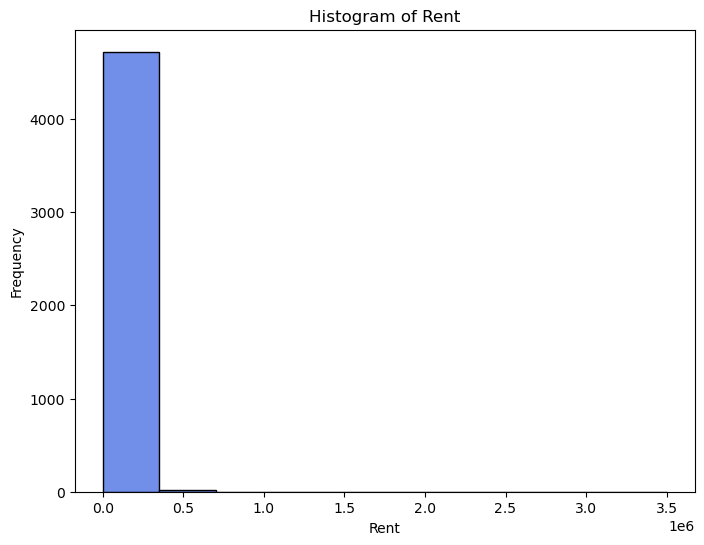

In [89]:
#임대료(Rent)의 데이터 분포 알아보기  1.'히스토그램'
# 히스토그램 시각화
plt.figure(figsize=(8, 6))
sns.histplot(rent_data['Rent'], kde=False, bins=10, color='royalblue')  

plt.title('Histogram of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')

# 플롯 보이기
plt.show()

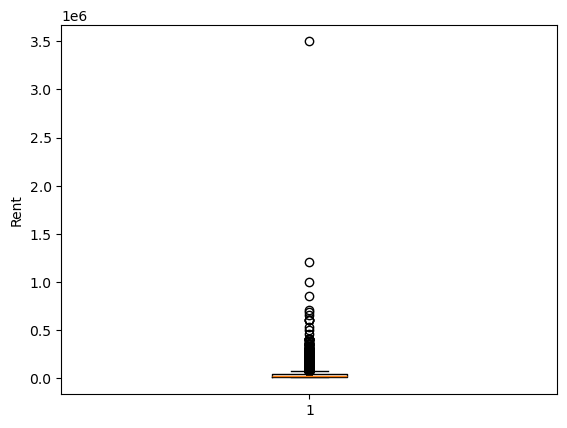

In [90]:
#2.박스플롯
# 이상치들이 많은 것을 알 수 있음 > 임대료 차이가 큼
plt.boxplot(rent_data['Rent'])

plt.ylabel('Rent')
plt.show()

In [91]:
rent_data.select_dtypes(np.number).columns

Index(['BHK', 'Rent', 'Size', 'Bathroom', 'TotalFloor', 'RentFloor'], dtype='object')

In [92]:
num_cols = ['BHK', 'Rent', 'Size', 'Bathroom']
cat_cols = ['RentFloor', 'TotalFloor']
cat_cols2 = ['Furnishing Status', 'Tenant Preferred','Point of Contact']

array([[<Axes: title={'center': 'BHK'}>,
        <Axes: title={'center': 'Rent'}>],
       [<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Bathroom'}>]], dtype=object)

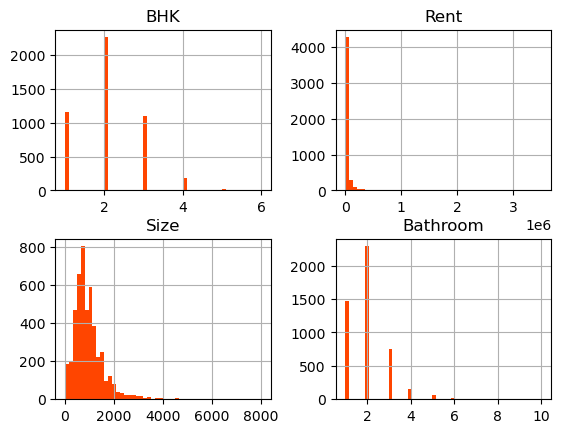

In [93]:
#정규분포가 쏠림이 심한 데이터 
rent_data[num_cols].hist(bins=50, color='orangered')

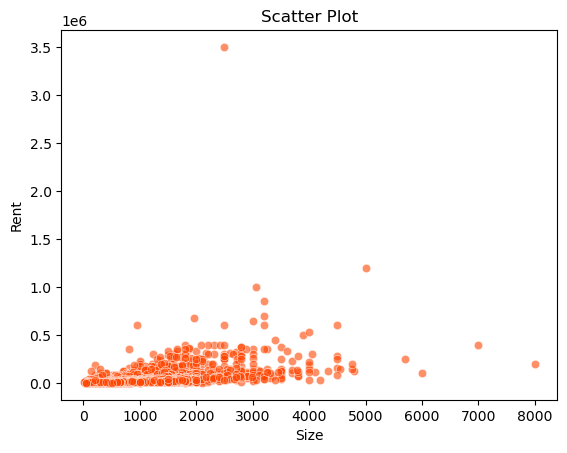

In [94]:
sns.scatterplot(data= rent_data, y=rent_data['Rent'], x=rent_data['Size'], \
                markers='o', color='orangered', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [95]:
rent_data.drop(rent_data.loc[rent_data['Rent']>2000000].index, inplace=True)

In [96]:
rent_data[num_cols] = rent_data[num_cols].apply(lambda x: np.log1p(x))

array([[<Axes: title={'center': 'BHK'}>,
        <Axes: title={'center': 'Rent'}>],
       [<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Bathroom'}>]], dtype=object)

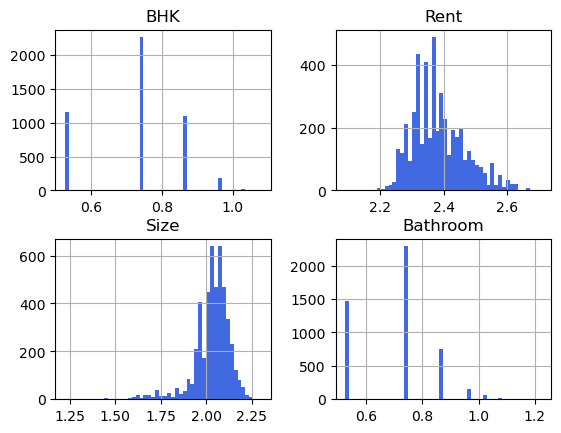

In [97]:
rent_data[num_cols].apply(lambda x: np.log1p(x)).hist(bins=50, color='royalblue')

In [98]:
#rent_data[num_cols].map(lambda x: np.log1p(x))

In [99]:
#rent_data[num_cols].map(lambda x: np.log1p(x)).hist(bins=50, color='dodgerblue')

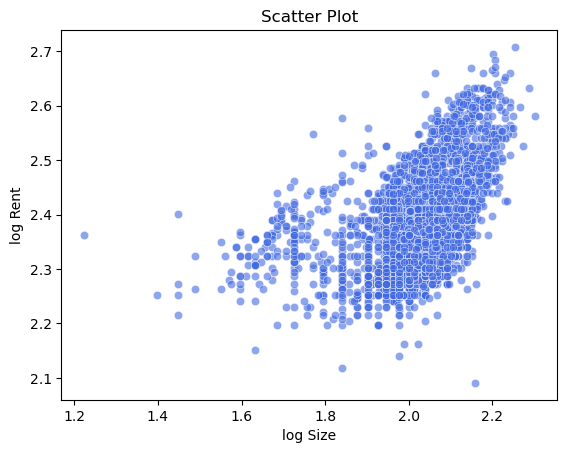

In [181]:
# 렌트와 가격의 scatter plot
# 임대료와 가격 로그 변환한 뒤 
sns.scatterplot(data= rent_data, y=np.log1p(rent_data['Rent']), x=np.log1p(rent_data['Size']), \
                markers='o', color='royalblue', alpha=0.6)
plt.title('Scatter Plot')
plt.xlabel('log Size')
plt.ylabel('log Rent')
plt.show()

In [103]:
num_cols = ['BHK', 'Rent', 'Size', 'Bathroom']
cat_cols = ['RentFloor', 'TotalFloor']
#'Tenant Preferred','Point of Contact']

In [104]:
#순서가 있는 카테고리형 만들기
rent_data['TotalFloor'].astype('category')

0        2
1        3
2        3
3        2
4        2
        ..
4741     5
4742     4
4743     5
4744    34
4745     5
Name: TotalFloor, Length: 4745, dtype: category
Categories (67, int8): [0, 1, 2, 3, ..., 78, 81, 85, 89]

In [105]:


rent_data['RentFloor'] = pd.Categorical(rent_data['RentFloor'],  ordered=True)
rent_data['RentFloor'].max()

76

In [106]:
rent_data['TotalFloor'] = pd.Categorical(rent_data['TotalFloor'],  ordered=True)
rent_data['TotalFloor'].max()

89

In [107]:
rent_data['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2250
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [108]:
rent_data['Furnishing Status'].astype('category')

0          Unfurnished
1       Semi-Furnished
2       Semi-Furnished
3          Unfurnished
4          Unfurnished
             ...      
4741    Semi-Furnished
4742    Semi-Furnished
4743    Semi-Furnished
4744    Semi-Furnished
4745       Unfurnished
Name: Furnishing Status, Length: 4745, dtype: category
Categories (3, object): ['Furnished', 'Semi-Furnished', 'Unfurnished']

In [109]:
rent_data['Furnishing Status'] = pd.Categorical(rent_data['Furnishing Status'], \
                                                categories=['Unfurnished','Semi-Furnished', 'Furnished'], \
                                                ordered=True)
rent_data['Furnishing Status']

0          Unfurnished
1       Semi-Furnished
2       Semi-Furnished
3          Unfurnished
4          Unfurnished
             ...      
4741    Semi-Furnished
4742    Semi-Furnished
4743    Semi-Furnished
4744    Semi-Furnished
4745       Unfurnished
Name: Furnishing Status, Length: 4745, dtype: category
Categories (3, object): ['Unfurnished' < 'Semi-Furnished' < 'Furnished']

In [110]:
rent_data['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [111]:
rent_data['Tenant Preferred'] = pd.Categorical(rent_data['Tenant Preferred'], \
                                                categories=['Bachelors', 'Bachelors/Family', 'Family'], \
                                                ordered=True)
rent_data['Tenant Preferred']

0       Bachelors/Family
1       Bachelors/Family
2       Bachelors/Family
3       Bachelors/Family
4              Bachelors
              ...       
4741    Bachelors/Family
4742    Bachelors/Family
4743    Bachelors/Family
4744              Family
4745           Bachelors
Name: Tenant Preferred, Length: 4745, dtype: category
Categories (3, object): ['Bachelors' < 'Bachelors/Family' < 'Family']

In [112]:
rent_data['Point of Contact'] = pd.Categorical(rent_data['Point of Contact'], \
                                                categories=['Contact Owner', 'Contact Agent'], \
                                                ordered=True)
rent_data['Point of Contact']

0       Contact Owner
1       Contact Owner
2       Contact Owner
3       Contact Owner
4       Contact Owner
            ...      
4741    Contact Owner
4742    Contact Owner
4743    Contact Agent
4744    Contact Agent
4745    Contact Owner
Name: Point of Contact, Length: 4745, dtype: category
Categories (2, object): ['Contact Owner' < 'Contact Agent']

In [113]:
num_corr = np.log1p(rent_data[num_cols]).corr(method= 'pearson')
cat_corr = rent_data[['RentFloor', 'TotalFloor','Rent']].corr( method= 'spearman')
corr = rent_data[num_cols+cat_cols].corr(method= 'spearman')

In [115]:
#스피어만 상관계수
from scipy.stats import spearmanr


Furnishing_corr, p_value = spearmanr(rent_data['Furnishing Status'], rent_data['Rent'])
Prefer_corr, p_value = spearmanr(rent_data['Tenant Preferred'], rent_data['Rent'])
Contact_corr, p_value = spearmanr(rent_data['Point of Contact'], rent_data['Rent'])

total_corr, p_value = spearmanr(rent_data[['Furnishing Status','Tenant Preferred','Point of Contact']], rent_data['Rent'])

In [125]:
total_corr

array([[ 1.        , -0.09905773,  0.13046636, -0.29863735],
       [-0.09905773,  1.        ,  0.07179757,  0.01249174],
       [ 0.13046636,  0.07179757,  1.        , -0.59618119],
       [-0.29863735,  0.01249174, -0.59618119,  1.        ]])

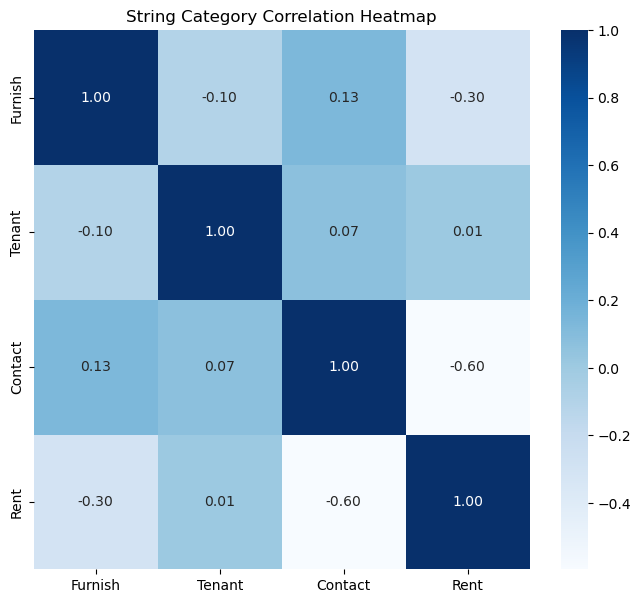

In [132]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(total_corr, annot=True, fmt='.2f', cmap='Blues')

plt.title('String Category Correlation Heatmap')
#plt.xticks(ticks=range(4), labels=['Furnish', 'Tenant', 'Contact', 'Rent'])
#plt.yticks(ticks=range(4), labels=['Furnish', 'Tenant', 'Contact', 'Rent'])
ax.set_xticks([x + 0.5 for x in range(4)], minor=False)
ax.set_yticks([y + 0.5 for y in range(4)], minor=False)
ax.set_xticklabels(['Furnish', 'Tenant', 'Contact', 'Rent'])
ax.set_yticklabels(['Furnish', 'Tenant', 'Contact', 'Rent'])



plt.show()

In [97]:
print(f'Furnishing_corr: {round(Furnishing_corr,2)}')
print(f'Prefer_corr: {round(Prefer_corr,2)}')
print(f'Contact_corr: {round(Contact_corr,2)}')

Furnishing_corr: -0.3
Prefer_corr: 0.01
Contact_corr: -0.6


<Axes: >

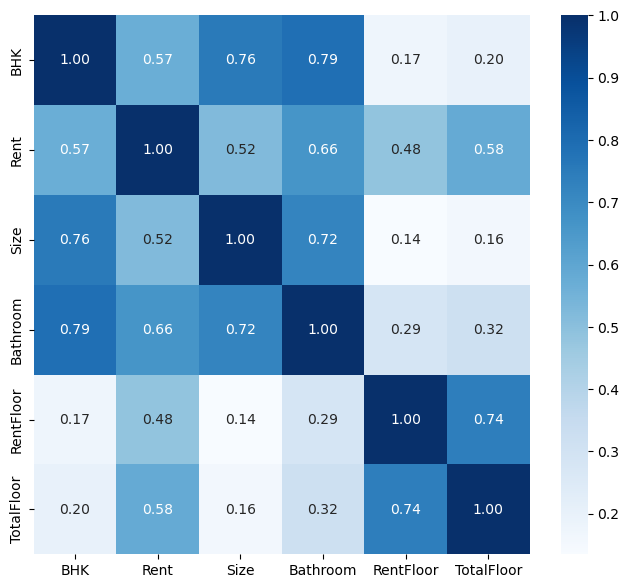

In [138]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', ax=ax)

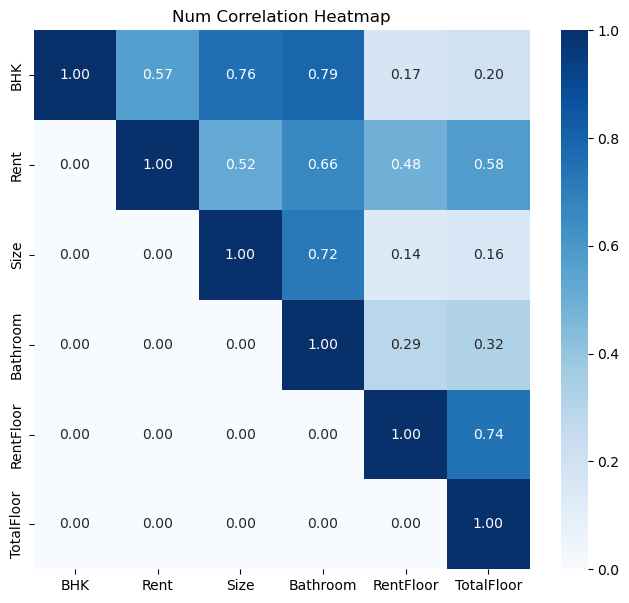

In [139]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(np.triu(corr), annot=True, fmt='.2f', cmap='Blues', ax=ax)

ax.set_xticks([x + 0.5 for x in range(6)], minor=False)
ax.set_yticks([y + 0.5 for y in range(6)], minor=False)
ax.set_xticklabels(['BHK', 'Rent', 'Size', 'Bathroom', 'RentFloor', 'TotalFloor'])
ax.set_yticklabels(['BHK', 'Rent', 'Size', 'Bathroom', 'RentFloor', 'TotalFloor'])

plt.title('Num Correlation Heatmap')
plt.show()

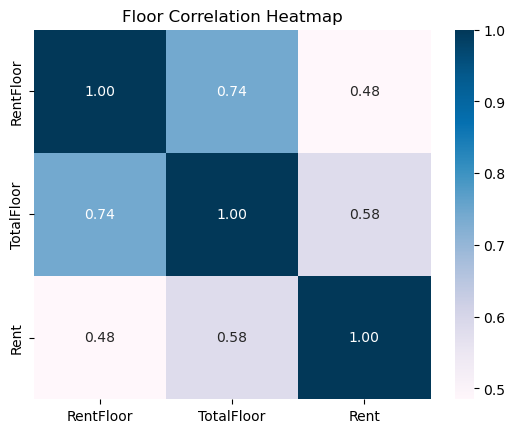

In [99]:
sns.heatmap(cat_corr, annot=True, cmap='PuBu', fmt='.2f')
plt.title('Floor Correlation Heatmap')
plt.show()

In [100]:
num_corr

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.558663,0.576457,0.779950
Rent,0.558663,1.000000,0.459241,0.670961
Size,0.576457,0.459241,1.000000,0.572881
Bathroom,0.779950,0.670961,0.572881,1.000000


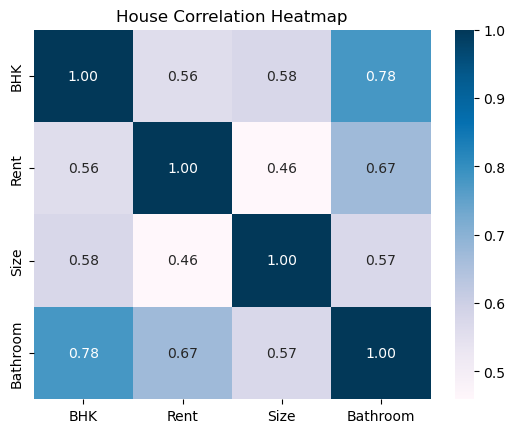

In [101]:
sns.heatmap(num_corr, annot=True, cmap='PuBu', fmt='.2f')
plt.title('House Correlation Heatmap')
plt.show()

In [140]:
len(rent_data['RentFloor'].unique())

53

In [141]:
rent_data['RentFloor'].value_counts()[0]

950

C:\Users\medici\AppData\Local\Temp\ipykernel_10128\324514793.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
C:\Users\medici\AppData\Local\Temp\ipykernel_10128\324514793.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)


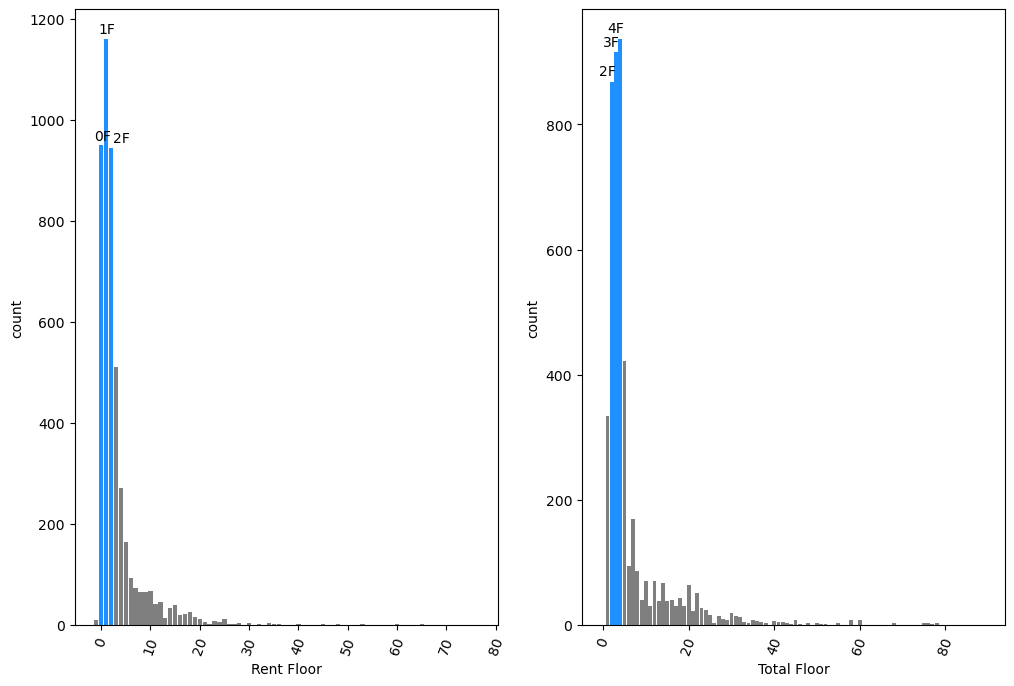

In [161]:
fig = plt.figure(figsize=(12, 8)) 
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for i, floor in enumerate(rent_data['RentFloor'].unique()):
    count = rent_data['RentFloor'].value_counts()[floor]
    if count >= 800:
        if i < 2 : 
            ax1.bar(floor, count, color='dodgerblue', width=0.9)
            ax1.text(floor-1.5, count+10, f'{floor}F', color='black', fontdict={'fontsize': 10}, rotation=360)
        if i == 2 :
            ax1.bar(floor, count, color='dodgerblue', width=0.9)
            ax1.text(floor+0.5, count+10, f'{floor}F', color='black', fontdict={'fontsize': 10}, rotation=360)
    else:
        ax1.bar(floor, count, color='tab:gray', width=0.9)


#ax1.set_xticks(rent_data['RentFloor'].unique())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
ax1.set_ylabel('count')
ax1.set_xlabel('Rent Floor')


for i, floor in enumerate(rent_data['TotalFloor'].unique()):
    count = rent_data['TotalFloor'].value_counts()[floor]
    if count >= 600:
        ax2.bar(floor, count, color='dodgerblue', width=0.9)
        ax2.text(floor-3, count+10, f'{floor}F', color='black', fontdict={'fontsize': 10}, rotation=360)
    else:
        ax2.bar(floor, count, color='tab:gray', width=0.9)


#ax2.set_xticks(rent_data['TotalFloor'].unique())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
ax2.set_ylabel('count')
ax2.set_xlabel('Total Floor')


plt.show()

### **도시별 분석**

In [105]:
rent_data['City'].value_counts().sort_values(ascending=False)

City
Mumbai       972
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

C:\Users\medici\AppData\Local\Temp\ipykernel_10128\1396705613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='City', data=rent_data, palette=my, ax=ax, order=sorted_cities,  width=0.7, saturation=0.7)


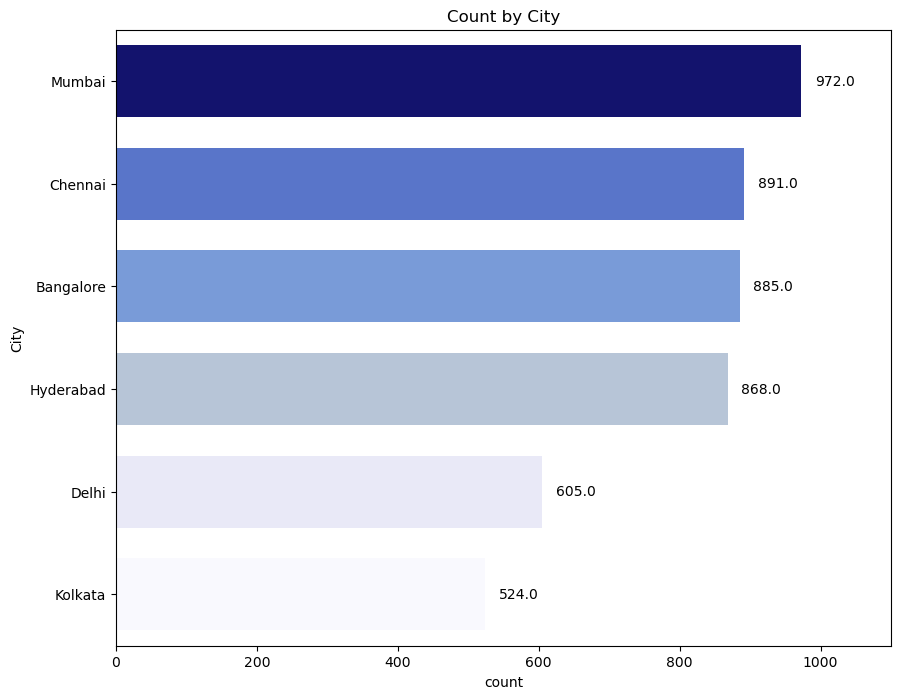

In [171]:
#도시별 주택수 > 호리젠탈로 바꾸기!!!!!!!!
fig = plt.figure(figsize=(10, 8)) 
ax = fig.subplots()

sorted_cities = rent_data['City'].value_counts().index
my =  ['navy','royalblue', 'cornflowerblue', 'lightsteelblue','lavender','ghostwhite']
sns.countplot(y='City', data=rent_data, palette=my, ax=ax, order=sorted_cities,  width=0.7, saturation=0.7)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(10, 0), textcoords='offset points')

ax.set_xlim(0,1100)
ax.set_title('Count by City')
plt.show()

Text(0.5, 1.0, 'Rent by City')

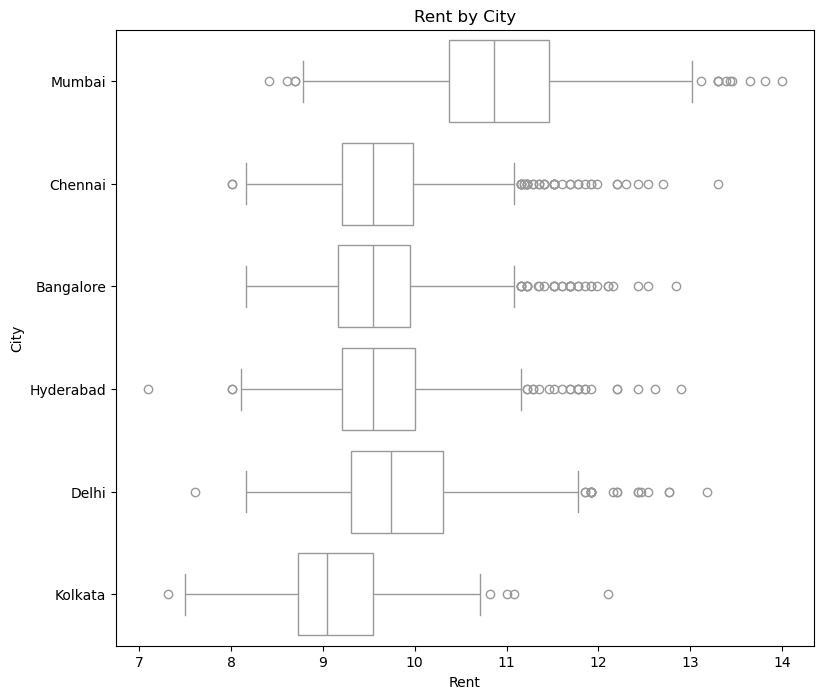

In [172]:
# 도시별 주택 가격 특징 (boxplot 이용)
# Bangalore에 엄청난 이상치 데이터 있음울 알 수 있음

fig = plt.figure(figsize = (9, 8))
sorted_cities = rent_data['City'].value_counts().index
sns.boxplot(x='Rent', y='City', data=rent_data, color='white',order=sorted_cities)

plt.title("Rent by City")

In [108]:
rent_data[['City', 'BHK','Rent', 'Bathroom', 'Size']].groupby(['City'], sort=True, as_index=False).agg(['mean','var'])

City       BHK                 Rent            Bathroom            \
                  mean       var       mean       var      mean       var   
0  Bangalore  1.040522  0.068697   9.628638  0.496289  0.989754  0.072476   
1    Chennai  1.110393  0.058985   9.645544  0.480546  1.067961  0.060617   
2      Delhi  1.096152  0.080994   9.855434  0.685691  1.002180  0.088035   
3  Hyderabad  1.133994  0.063066   9.634704  0.456298  1.112196  0.068550   
4    Kolkata  1.054229  0.065920   9.150935  0.358021  0.863303  0.048123   
5     Mumbai  1.092285  0.092961  10.937095  0.772266  1.146679  0.085268   

       Size            
       mean       var  
0  6.733658  0.326851  
1  6.813602  0.255842  
2  6.199866  1.192515  
3  6.868700  0.558144  
4  6.530095  0.319297  
5  6.658768  0.286332

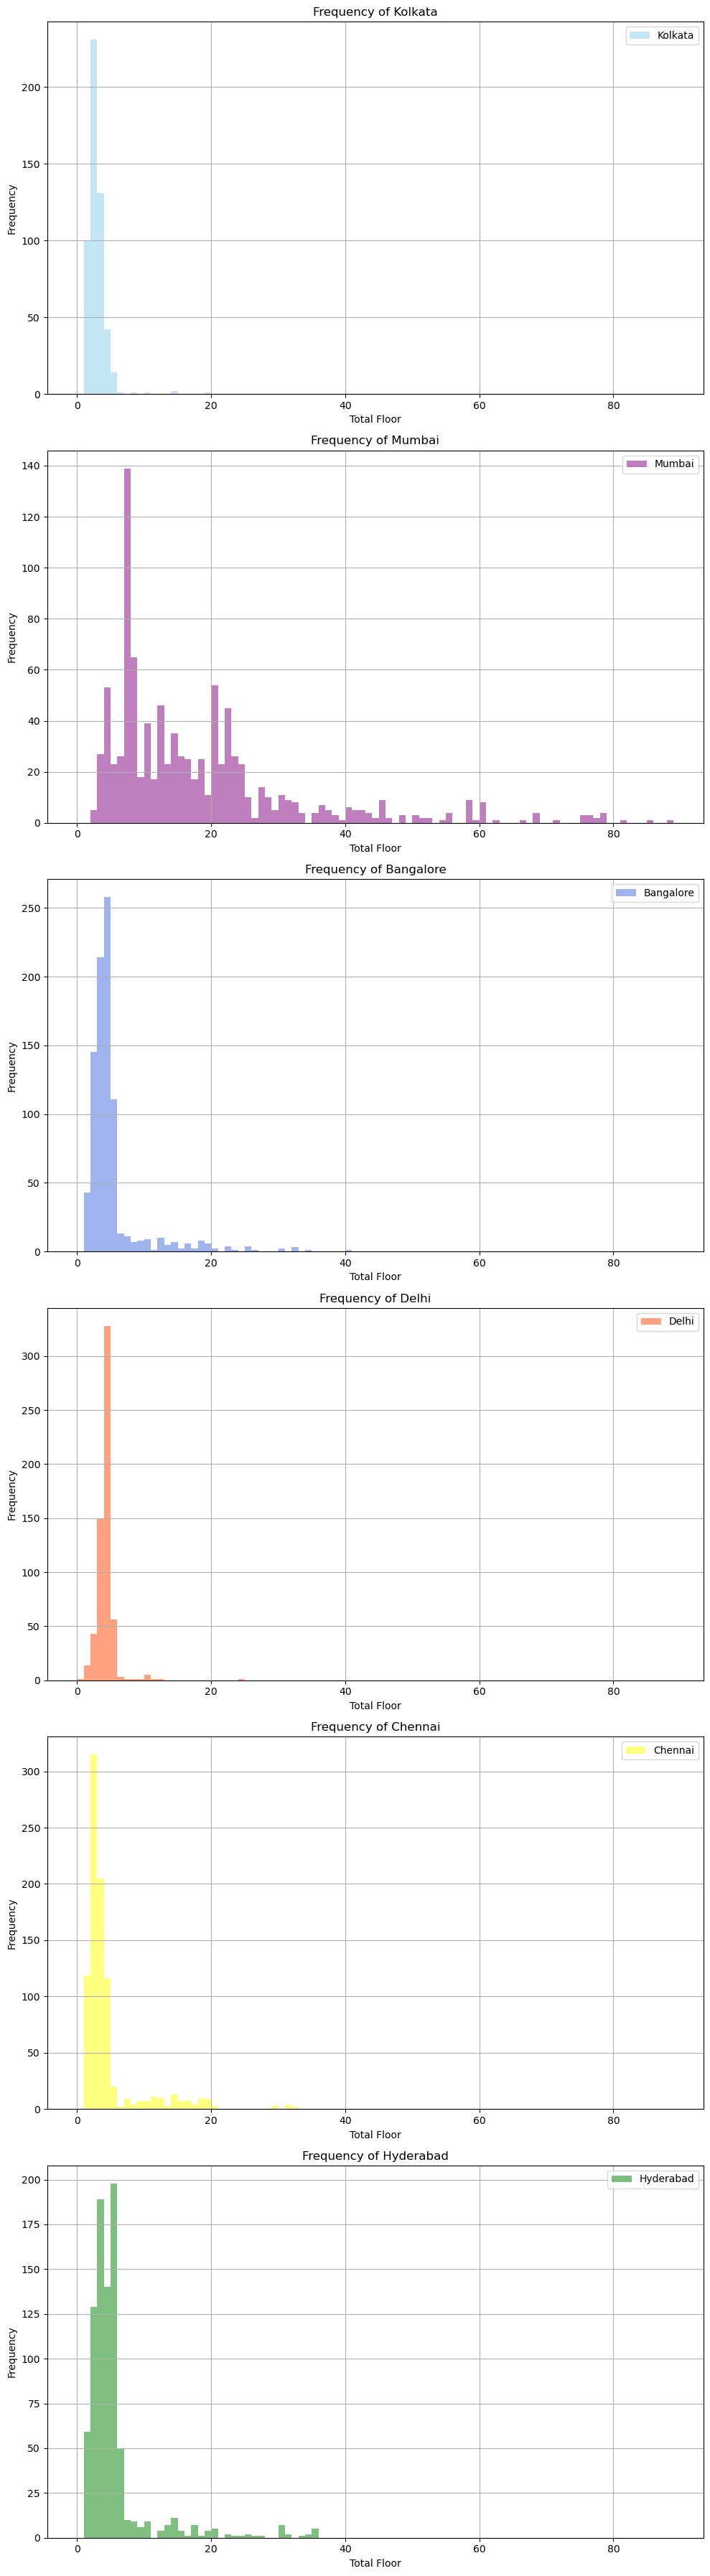

In [173]:
cities = rent_data['City'].unique()

# 서로 다른 ax에 히스토그램 그리기
fig, axs = plt.subplots(len(cities), figsize=(10, 6 * len(cities)))
my = ['skyblue','purple', 'royalblue', 'orangered','yellow', 'green']
for i, city in enumerate(cities):
    city_data = rent_data[rent_data['City'] == city]['TotalFloor']
    axs[i].hist(city_data, bins=range(min(rent_data['TotalFloor']), max(rent_data['TotalFloor']) + 1), alpha=0.5, label=city, color=my[i])
    axs[i].set_title(f'Frequency of {city}')
    axs[i].set_xlabel('Total Floor')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

In [110]:
categories = ['Furnishing Status', 'Tenant Preferred', 'Point of Contact']

C:\Users\medici\AppData\Local\Temp\ipykernel_10128\2509337299.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = rent_data.reset_index().groupby(['Furnishing Status', 'City'], as_index=False)['index'].count()
C:\Users\medici\AppData\Local\Temp\ipykernel_10128\2509337299.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_indices = category_counts.groupby('Furnishing Status')['count'].idxmax()


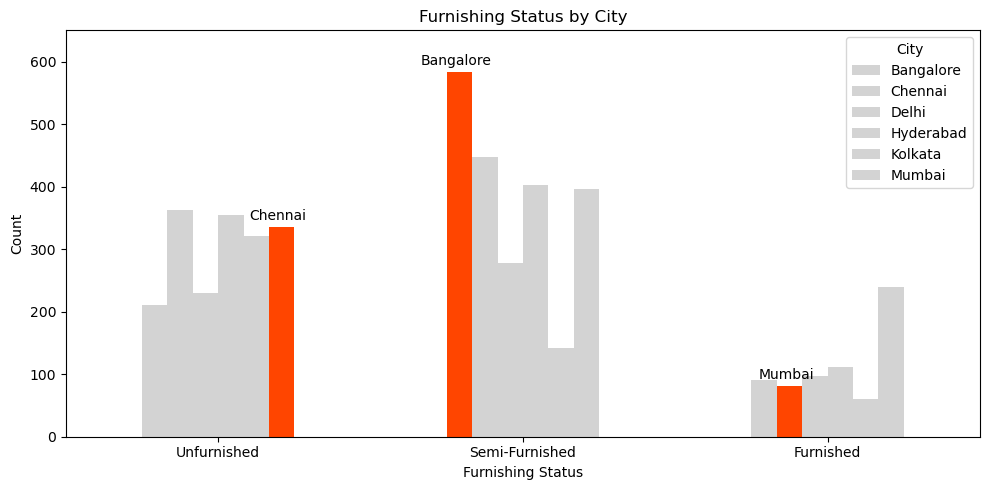

In [182]:
fig = plt.figure(figsize=(10, 5), tight_layout=True)
ax = fig.subplots()

category_counts = rent_data.reset_index().groupby(['Furnishing Status', 'City'], as_index=False)['index'].count()
category_counts.rename(columns={'index': 'count'}, inplace=True)

All_gray=['lightgray','lightgray', 'lightgray', 'lightgray', 'lightgray','lightgray']
bars = sns.barplot(category_counts, x='Furnishing Status', y='count', hue='City', palette=All_gray, width=0.5, ax=ax)
max_indices = category_counts.groupby('Furnishing Status')['count'].idxmax()



for i, idx in enumerate([1,5,15]):
    rect = bars.patches[idx]
    rect.set_facecolor('orangered')
    x = rect.get_x()
    y = rect.get_height()
    ax.annotate(category_counts['City'][max_indices].tolist()[i-2], (x+0.03, y+6), fontsize=10, ha='center', va='bottom')
        
    
ax.set_xlabel('Furnishing Status')
ax.set_ylabel('Count')
ax.set_ylim(0, 650)
ax.set_title('Furnishing Status by City')


plt.show()

C:\Users\medici\AppData\Local\Temp\ipykernel_10128\2306667043.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = rent_data.reset_index().groupby(['Tenant Preferred', 'City'], as_index=False)['index'].count()
C:\Users\medici\AppData\Local\Temp\ipykernel_10128\2306667043.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_indices = category_counts.groupby( 'Tenant Preferred')['count'].idxmax()


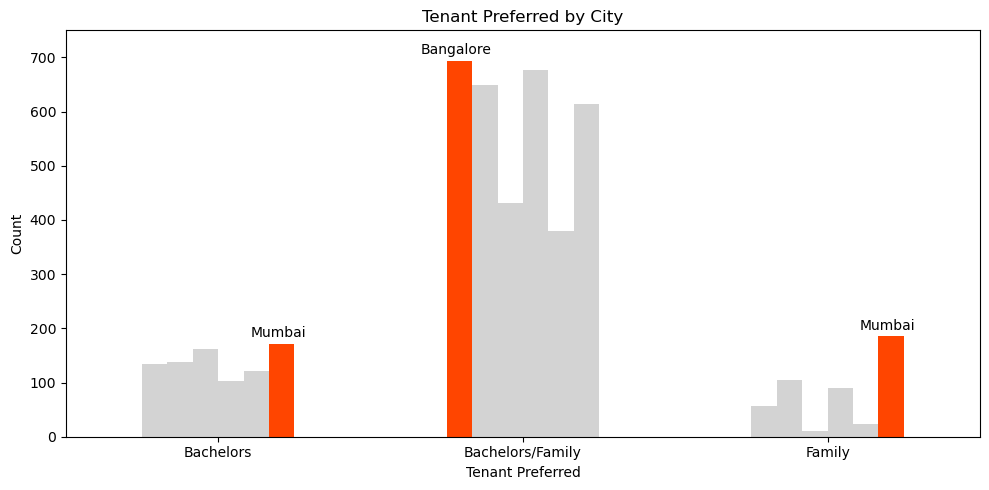

In [177]:
fig = plt.figure(figsize=(10, 5), tight_layout=True)
ax = fig.subplots()

category_counts = rent_data.reset_index().groupby(['Tenant Preferred', 'City'], as_index=False)['index'].count()
category_counts.rename(columns={'index': 'count'}, inplace=True)

All_gray=['lightgray','lightgray', 'lightgray', 'lightgray', 'lightgray','lightgray']
bars = sns.barplot(category_counts, x='Tenant Preferred', y='count', hue='City', palette=All_gray, width=0.5, ax=ax)
max_indices = category_counts.groupby( 'Tenant Preferred')['count'].idxmax()



for i, idx in enumerate([1,15,17]):
    rect = bars.patches[idx]
    rect.set_facecolor('orangered')
    x = rect.get_x()
    y = rect.get_height()
    ax.annotate(category_counts['City'][max_indices].tolist()[i-2], (x+0.03, y+6), fontsize=10, ha='center', va='bottom')
        
    
ax.set_xlabel( 'Tenant Preferred')
ax.set_ylabel('Count')
ax.set_ylim(0, 750)
ax.set_title('Tenant Preferred by City')
ax.legend().set_visible(False)

plt.show()

In [248]:
category_counts['City'].tolist()[3]

'Hyderabad'

C:\Users\medici\AppData\Local\Temp\ipykernel_10128\4040411246.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = rent_data.reset_index().groupby(['Point of Contact', 'City'], as_index=False)['index'].count()
C:\Users\medici\AppData\Local\Temp\ipykernel_10128\4040411246.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_indices = category_counts.groupby('Point of Contact')['count'].idxmax()


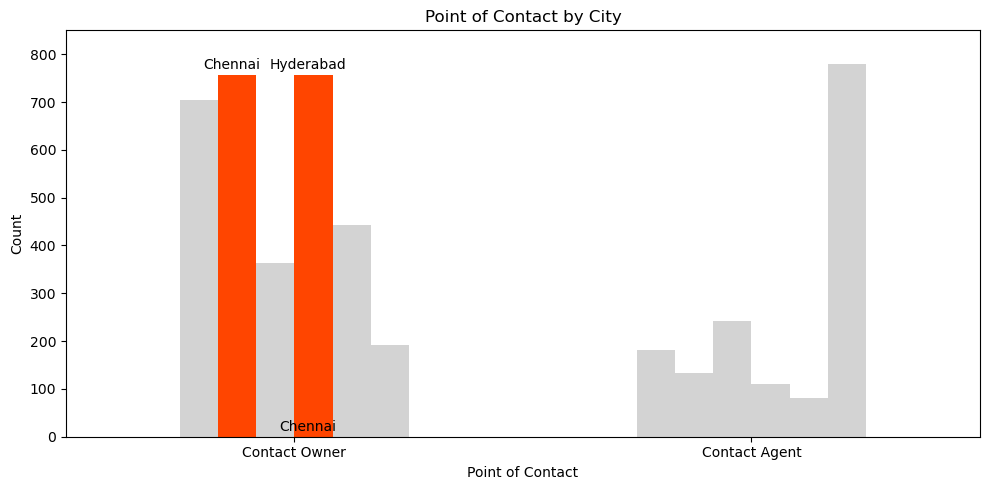

In [187]:
fig = plt.figure(figsize=(10, 5), tight_layout=True)
ax = fig.subplots()

category_counts = rent_data.reset_index().groupby(['Point of Contact', 'City'], as_index=False)['index'].count()
category_counts.rename(columns={'index': 'count'}, inplace=True)

All_gray=['lightgray','lightgray', 'lightgray', 'lightgray', 'lightgray','lightgray']
bars = sns.barplot(category_counts, x='Point of Contact', y='count', hue='City', palette=All_gray, width=0.5, ax=ax)
max_indices = category_counts.groupby('Point of Contact')['count'].idxmax()



for i, idx in enumerate([10,3,7]):
    rect = bars.patches[idx]
    rect.set_facecolor('orangered')
    x = rect.get_x()
    y = rect.get_height()
    if i < 2:
        ax.annotate(category_counts['City'][max_indices].tolist()[i-2], (x+0.03, y+6), fontsize=10, ha='center', va='bottom')
    else:
        ax.annotate(category_counts['City'].tolist()[3], (x+0.03, y+6), fontsize=10, ha='center', va='bottom')
        
    
ax.set_xlabel('Point of Contact')
ax.set_ylabel('Count')
ax.set_ylim(0, 850)
ax.set_title('Point of Contact by City')


plt.show()

In [273]:
max_indices

Area Type
Built Area      0
Carpet Area     7
Super Area     11
Name: count, dtype: int64

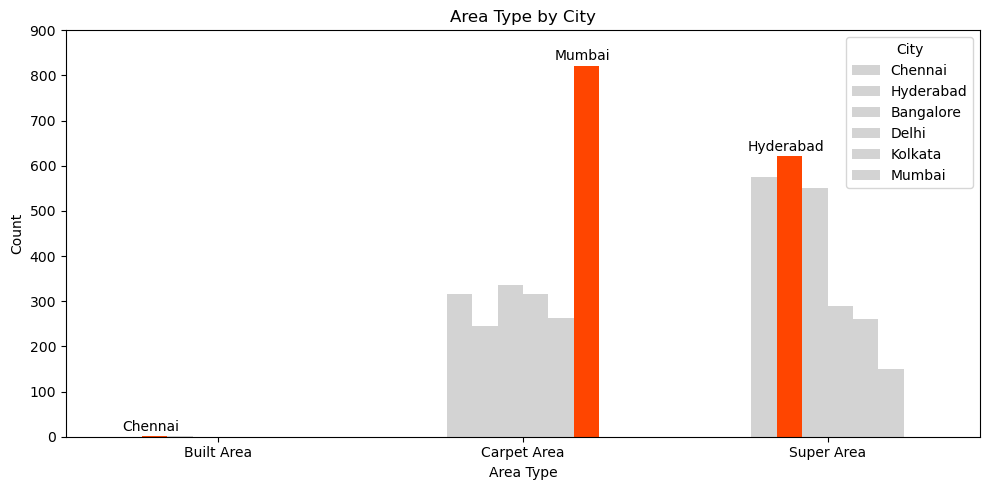

In [283]:
fig = plt.figure(figsize=(10, 5), tight_layout=True)
ax = fig.subplots()

category_counts = rent_data.reset_index().groupby(['Area Type', 'City'], as_index=False)['index'].count()
category_counts.rename(columns={'index': 'count'}, inplace=True)

All_gray=['lightgray','lightgray', 'lightgray', 'lightgray', 'lightgray','lightgray']
bars = sns.barplot(category_counts, x='Area Type', y='count', hue='City', palette=All_gray, width=0.5, ax=ax)
max_indices = category_counts.groupby('Area Type')['count'].idxmax()



for i, idx in enumerate([0,16,5]):
    rect = bars.patches[idx]
    rect.set_facecolor('orangered')
    x = rect.get_x()
    y = rect.get_height()

    ax.annotate(category_counts['City'][max_indices].tolist()[i], (x+0.03, y+6), fontsize=10, ha='center', va='bottom')
    
        
    
ax.set_xlabel('Area Type')
ax.set_ylabel('Count')
ax.set_ylim(0,900)
ax.set_title('Area Type by City')


plt.show()

In [ ]:
sns.heatmap(cat_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Floor Correlation Heatmap')
plt.show()